# Loan Application Predication

The very first step is to preprocess the dataset.


Importing required libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

Loading Dataset

In [2]:
train_df = pd.read_csv('Assignment_Train.csv')
test_df = pd.read_csv('Assignment_Test.csv')

In [3]:
uid=test_df['UID']

concatenate the training and test file to preprocess them together

In [4]:
df = pd.concat([train_df, test_df], axis=0, ignore_index=True)

Missing values

In [5]:
numeric_col= df.select_dtypes(include=['int64', 'float64']).columns
categorical_col = df.select_dtypes(include=['object']).columns

Using simple imputer to add missing values

In [6]:
#Numeric cols
numeric= SimpleImputer(strategy='mean')
df[numeric_col] = numeric.fit_transform(df[numeric_col])
#categorical values
categorical = SimpleImputer(strategy='most_frequent')
df[categorical_col] = categorical.fit_transform(df[categorical_col])

Encoding categorical values

In [7]:
le = LabelEncoder()
for col in categorical_col:
    df[col] = le.fit_transform(df[col].astype(str))

Normalization

In [8]:
scaler = StandardScaler()
df[numeric_col] = scaler.fit_transform(df[numeric_col])

Lets drop unwanted features

In [9]:
sum(df['MOBILE VERIFICATION'])

12000

In [10]:
sum(df['AADHAR VERIFIED'])

0

In [11]:
df=df.drop(['DOB','Phone Social Premium.paytm','Phone Social Premium.byjus','Phone Social Premium.flipkart','Phone Social Premium.housing','Phone Social Premium.microsoft','Phone Social Premium.skype','APPLICATION LOGIN DATE','HDB BRANCH NAME','HDB BRANCH STATE','UID','AADHAR VERIFIED','MOBILE VERIFICATION','Phone Social Premium.isWABusiness','Phone Social Premium.my11','FIRST NAME','MIDDLE NAME','LAST NAME','Personal Email Address','name','Phone Social Premium.jeevansaathi','Phone Social Premium.jiomart','Phone Social Premium.rummycircle','Phone Social Premium.shaadi','Phone Social Premium.toi','Phone Social Premium.zoho','Phone Social Premium.a23games','upi_name','Primary Asset Model No','ASSET MODEL NO','DEALER NAME','Phone Social Premium.yatra','EMPLOYER NAME','Pan Name','mobile','Phone Social Premium.indiamart','DEALER ID'],axis=1)

In [12]:
df.corr()

,Cibil Score,TOTAL ASSET COST,ASSET CTG,APPLIED AMOUNT,PRIMARY ASSET MAKE,MARITAL STATUS,GENDER,AGE,ADDRESS TYPE,EMPLOY CONSTITUTION,EMPLOYER TYPE,vpa,Phone Social Premium.amazon,Phone Social Premium.instagram,Phone Social Premium.whatsapp,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status
Cibil Score,1.000000,1.135638e-02,0.229444,0.006184,0.002541,0.142085,-0.073330,-0.003445,-0.130179,-0.158285,-0.149266,-0.013518,-0.012081,-0.001607,-0.002071,0.010822,-0.028175,0.003908,-4.532143e-01
TOTAL ASSET COST,0.011356,1.000000e+00,0.279647,0.283398,0.206251,0.081536,-0.010237,-0.022996,0.007197,-0.027193,-0.030813,-0.020537,0.040717,-0.005430,0.001426,0.019508,0.049027,-0.017060,-1.117522e-17
ASSET CTG,0.229444,2.796466e-01,1.000000,0.043472,0.228047,0.210579,-0.126724,0.103867,-0.211919,-0.314391,-0.293306,-0.013715,0.021314,-0.019055,-0.002962,0.038715,0.019566,-0.020182,-3.588725e-01
APPLIED AMOUNT,0.006184,2.833983e-01,0.043472,1.000000,0.161316,0.000539,-0.006856,-0.013359,0.020292,0.019481,0.015379,-0.009352,0.046777,-0.008570,0.004800,0.025149,0.031966,-0.014380,-7.211087e-03
PRIMARY ASSET MAKE,0.002541,2.062506e-01,0.228047,0.161316,1.000000,-0.003405,-0.075799,0.034895,-0.017424,-0.030640,-0.030990,-0.000944,0.050836,0.000785,0.004938,0.037030,0.018248,-0.017435,2.671059e-03
MARITAL STATUS,0.142085,8.153616e-02,0.210579,0.000539,-0.003405,1.000000,0.076019,-0.250560,-0.229702,-0.235305,-0.214137,-0.058711,0.082480,0.019951,0.021467,-0.017774,0.080401,-0.047271,-2.213049e-01
GENDER,-0.073330,-1.023671e-02,-0.126724,-0.006856,-0.075799,0.076019,1.000000,-0.064253,-0.029120,0.024999,0.024519,-0.040057,0.012415,0.006692,0.022144,-0.003791,0.134525,-0.028139,-2.048193e-02
AGE,-0.003445,-2.299646e-02,0.103867,-0.013359,0.034895,-0.250560,-0.064253,1.000000,0.065440,0.015039,0.017066,0.077063,-0.106950,-0.029935,-0.019104,0.063695,-0.129181,0.066019,-4.395477e-02
ADDRESS TYPE,-0.130179,7.196661e-03,-0.211919,0.020292,-0.017424,-0.229702,-0.029120,0.065440,1.000000,0.212694,0.199304,0.021787,-0.031117,0.001950,-0.008890,0.007893,-0.047770,0.023337,1.982010e-01
EMPLOY CONSTITUTION,-0.158285,-2.719333e-02,-0.314391,0.019481,-0.030640,-0.235305,0.024999,0.015039,0.212694,1.000000,0.939625,0.049044,-0.050028,-0.006742,-0.011297,-0.008601,-0.063850,0.045259,2.545667e-01


Lets draw some insights using diagrams

In [13]:
plt.style.use('seaborn')

C:\Users\kunal\AppData\Local\Temp\ipykernel_4668\240305066.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


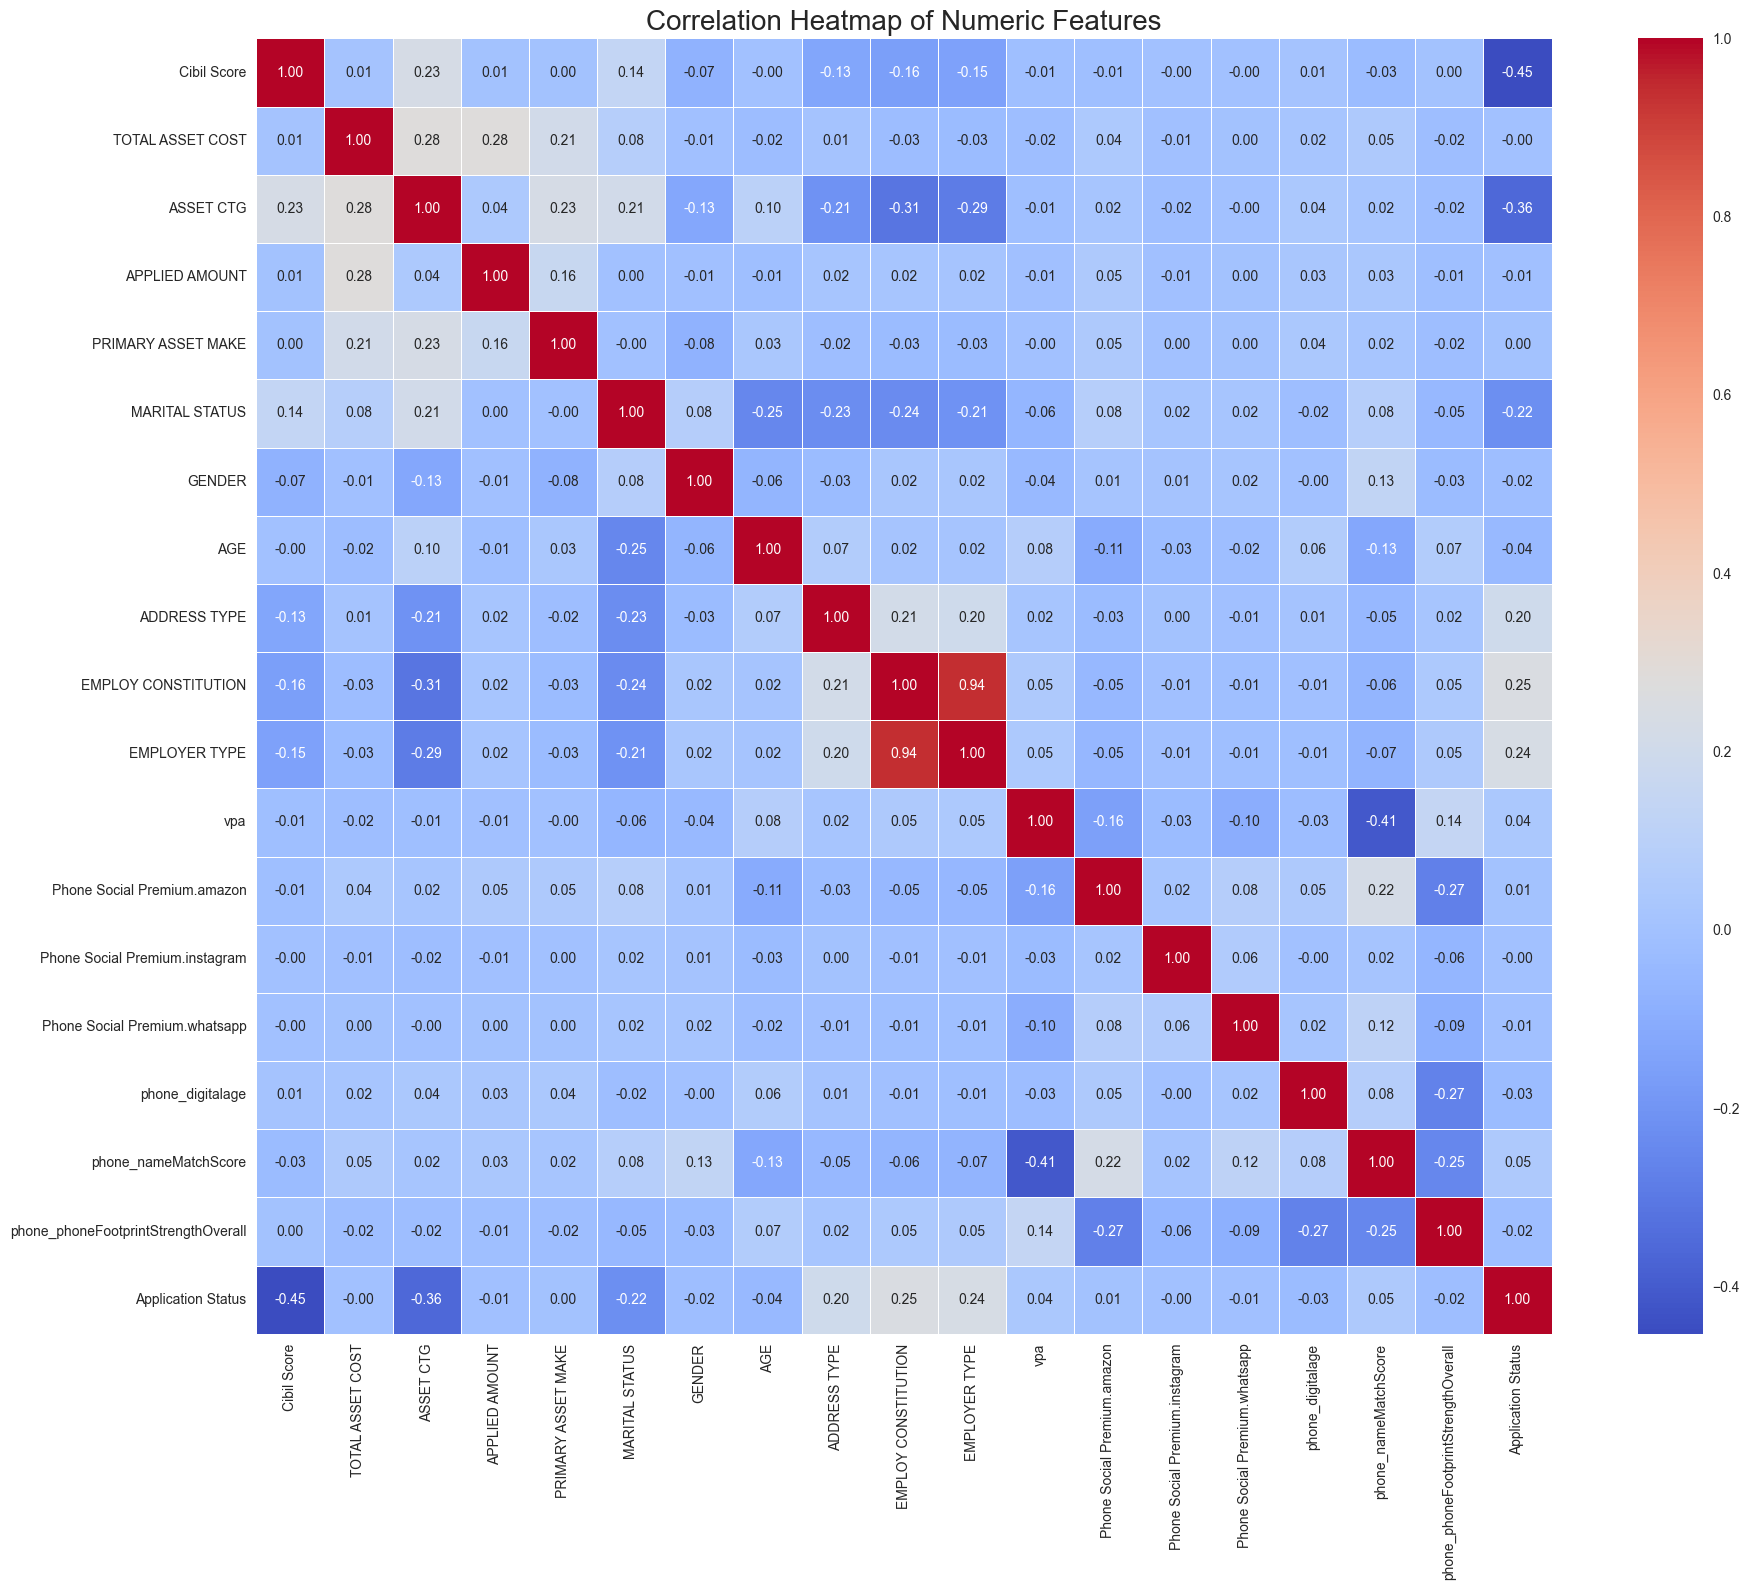

In [14]:
# Lets see the correlation heatmap for our understanding obout the current relevant features.
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), 
            annot=True, 
            cmap='coolwarm', 
            linewidths=0.5, 
            fmt='.2f',
            square=True)

# Set the title
plt.title('Correlation Heatmap of Numeric Features', fontsize=20)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

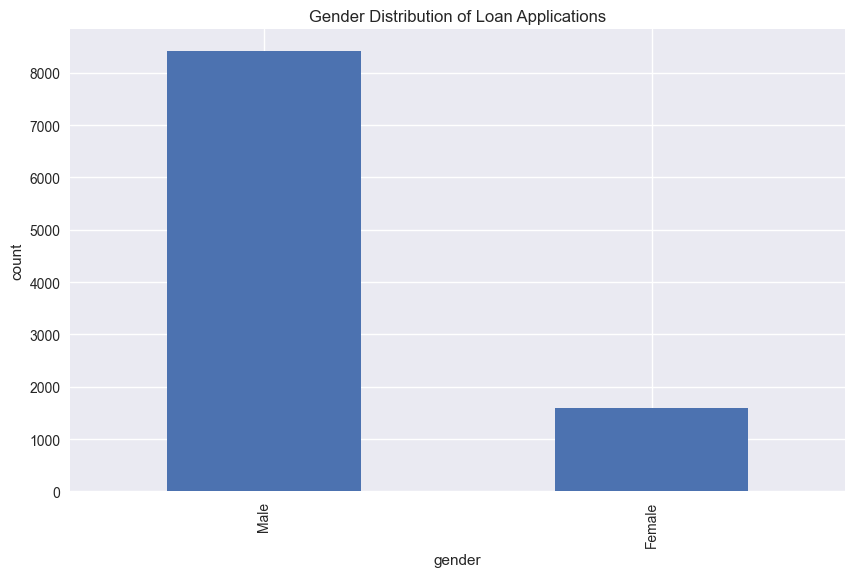

In [15]:
# gender distribution
plt.figure(figsize=(10, 6))
train_df['GENDER'].value_counts().plot(kind='bar')
plt.title('Gender Distribution of Loan Applications')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

<Figure size 1000x600 with 0 Axes>

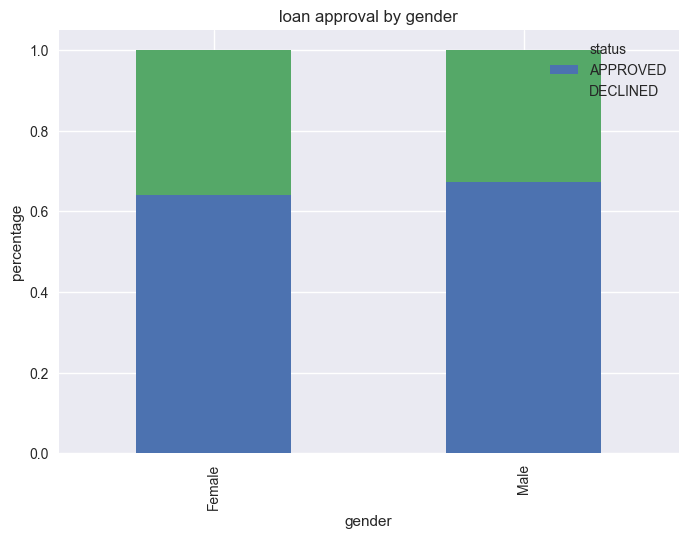

In [16]:
#Loan approval rates by gender
plt.figure(figsize=(10, 6))
approval_rates = train_df.groupby('GENDER')['Application Status'].value_counts(normalize=True).unstack()
approval_rates.plot(kind='bar', stacked=True)
plt.title('loan approval by gender')
plt.xlabel('gender')
plt.ylabel('percentage')
plt.legend(title='status', loc='upper right')
plt.show()

c:\Users\kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

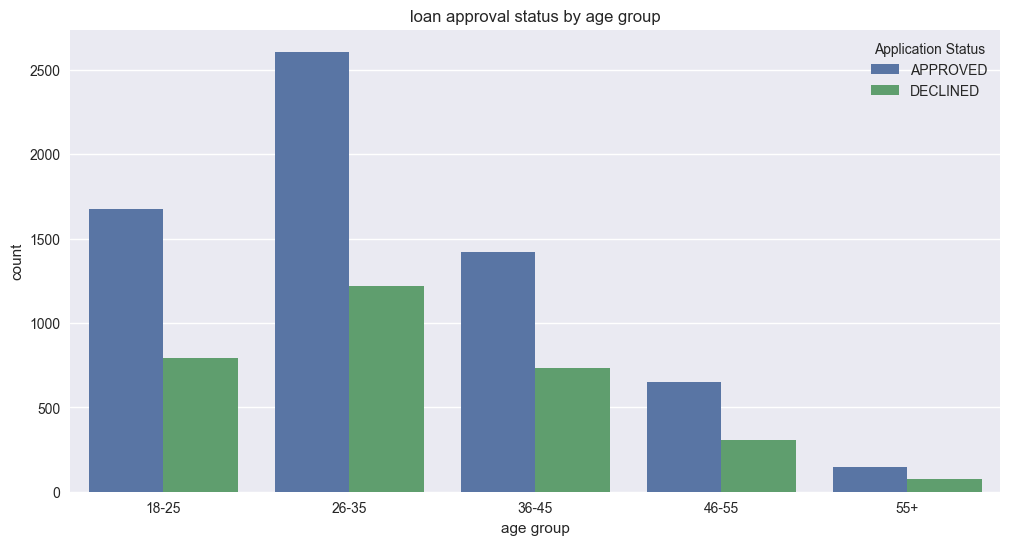

In [17]:
# Loan approval by age group
train_df['AGE_GROUP'] = pd.cut(train_df['AGE'], bins=[0, 25, 35, 45, 55, 100], labels=['18-25', '26-35', '36-45', '46-55', '55+'])
plt.figure(figsize=(12, 6))
sns.countplot(x='AGE_GROUP', hue='Application Status', data=train_df)
plt.title('loan approval status by age group')
plt.xlabel('age group')
plt.ylabel('count')
plt.show()

c:\Users\kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

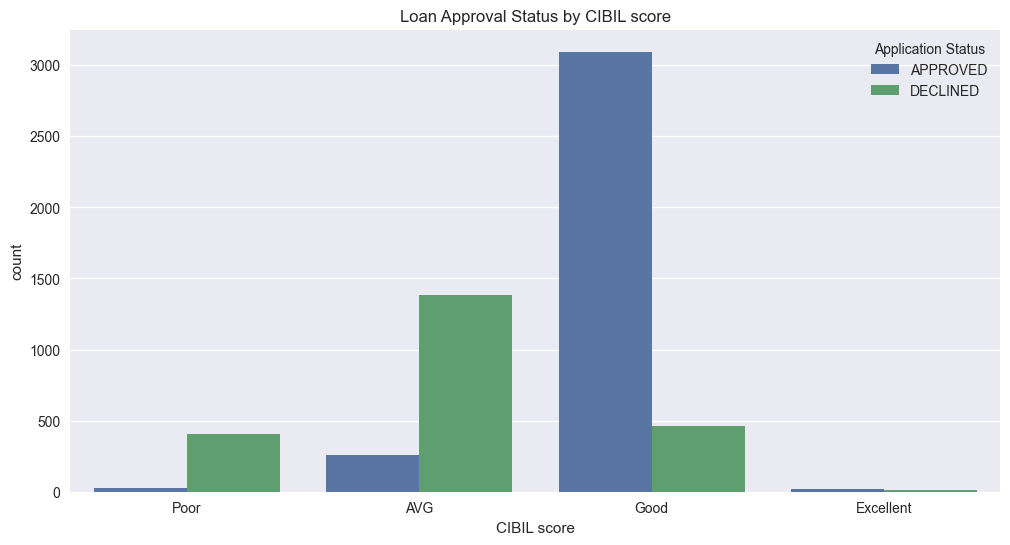

CIBIL_RANGE
Good         3556
AVG          1644
Poor          431
Excellent      34
Name: count, dtype: int64

Loan approval by CIBIL Range:
Application Status  APPROVED  DECLINED
CIBIL_RANGE                           
Poor                0.058005  0.941995
AVG                 0.158151  0.841849
Good                0.870360  0.129640
Excellent           0.588235  0.411765


C:\Users\kunal\AppData\Local\Temp\ipykernel_4668\1390851764.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(train_df.groupby('CIBIL_RANGE')['Application Status'].value_counts(normalize=True).unstack())


In [18]:
# Loan Approvl by CIBIL range.

train_df['Cibil Score'] = pd.to_numeric(train_df['Cibil Score'], errors='coerce')

train_df = train_df.dropna(subset=['Cibil Score'])

train_df['CIBIL_RANGE'] = pd.cut(train_df['Cibil Score'], 
                                 bins=[0, 600, 700, 800, 900], 
                                 labels=['Poor', 'AVG', 'Good', 'Excellent'])

plt.figure(figsize=(12, 6))
sns.countplot(x='CIBIL_RANGE', hue='Application Status', data=train_df)
plt.title('Loan Approval Status by CIBIL score')
plt.xlabel('CIBIL score')
plt.ylabel('count')
plt.show()

print(train_df['CIBIL_RANGE'].value_counts())
print("\nLoan approval by CIBIL Range:")
print(train_df.groupby('CIBIL_RANGE')['Application Status'].value_counts(normalize=True).unstack())

Lets start building the model to predict the risk assessment for the vehicle loan

In [19]:
# seperating training testing files.
train_df = df[:10000]
test_df = df[10000:]
train_df.shape


(10000, 19)

In [20]:
X=train_df.drop(['Application Status'],axis=1)
y=train_df['Application Status']

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Check the performances of two algorithms to find the better accuracy.(naive bayes performance and Random FOrest) 

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score

nb = GaussianNB()
rf = RandomForestClassifier(n_estimators=130, random_state=112)

In [23]:
nb.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=130, random_state=112)

In [24]:
nb_pred = nb.predict(X_val)
rf_pred = rf.predict(X_val)

In [25]:
print("Naive Bayes Model Performance:")
print("Accuracy:", accuracy_score(y_val, nb_pred))
print("Classification Report:")
print(classification_report(y_val, nb_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, nb_pred))

Naive Bayes Model Performance:
Accuracy: 0.825
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.74      0.85      1327
           1       0.66      0.99      0.79       673

    accuracy                           0.82      2000
   macro avg       0.83      0.87      0.82      2000
weighted avg       0.88      0.82      0.83      2000

Confusion Matrix:
[[985 342]
 [  8 665]]


In [26]:
print("\nRandom Forest Model Performance:")
print("Accuracy:", accuracy_score(y_val, rf_pred))
print("Classification Report:")
print(classification_report(y_val, rf_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, rf_pred))


Random Forest Model Performance:
Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1327
           1       0.82      0.79      0.80       673

    accuracy                           0.87      2000
   macro avg       0.86      0.85      0.85      2000
weighted avg       0.87      0.87      0.87      2000

Confusion Matrix:
[[1207  120]
 [ 140  533]]


In [27]:
test_df.shape

(2000, 19)

In [28]:
test_df=test_df.drop('Application Status',axis=1)
test_predictions = rf.predict(test_df)

# Create a DataFrame with UID and predictions
predictions_df = pd.DataFrame({
    'UID': uid,
    'Prediction': test_predictions
})

# Save predictions to CSV file
predictions_df.to_csv('predictions.csv', index=False)

print("Predictions have been saved to 'prediction.csv'")

# Display the first few rows of the predictions
print(predictions_df.head())

Predictions have been saved to 'prediction.csv'
            UID  Prediction
0  1.844050e+18           0
1  1.840350e+18           0
2  1.488100e+18           0
3  5.555300e+17           1
4  1.010210e+18           0
